# Regresja liniowa z regularyzacją

**UWAGA**: w tym notebooku znajduje się sporo tekstu, ale jego druga połowa to duże zadanie.

### Czytanka
Fajne tutoriale, dostarczające sporo intuicji:
* https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/
* https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/
* Obszerny przykład, omawiający charakterystykę obydwu metod regularyzacji i wpływ doboru parametrów na sposób dopasowania: https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb
* Konkurs na Kaggle, który dostarcza przydatnego zbioru danych: https://www.kaggle.com/apapiu/regularized-linear-models
* Opis implementacji: http://www.geeksforgeeks.org/linear-regression-python-implementation/
* (*) Implementacja prostej regresji liniowej (od zera): http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-1/
* (\**) Implementacja regresji dla wielu zmiennych: http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-2/
* Gradient descent: https://en.wikipedia.org/wiki/Gradient_descent

### Podstawowe info
#### 1. Regresja w wielu wymiarach:
Bardzo często chcemy dopasować prostą do danych o większej wymiarowości. Przykładowo, cena domu może zależeć od jego powierzchni, ilości pokoi i ilości pięter (w praktyce takich cech danych może być bardzo dużo). Na szczęście idea jest w zasadzie identyczna, jak przy jednowymiarowej regresji z poprzednich zajęć. Zwróćmy uwagę, że gdy umiemy dopasowywać funkcję liniową w wielu wymiarach, możemy robić różne zagraniczne tricki: nikt nie broni nam sztucznie stworzyć sobie nowych zmiennych, będących nieliniowymi przekształceniami istniejących zmiennych. W ten sposób za pomocą jednego algorytmu możemy dopasowywać zarówno funkcje liniowe, jak i np. wielomiany. (Więcej: na zajęciach). <img src="images/dataset.jpg">

Swoją drogą, w internecie wymiennie można znaleźć pojęcia "multi(ple) regression" i "multivariate regression". Można założyć, że pierwsza z nich odnosi się do funkcji z wielowymiarową dziedziną, ale jednowymiarową przeciwdziedziną, natomiast to drugie: z wielowymiarową dziedziną i przeciwdziedziną.

#### 2. **Gradient descent**:
O ile dla małych/prostych zbiorów danych jesteśmy w stanie wyliczyć najlepsze dopasowanie analitycznie (por. MOwNiT 1, laboratorium), o tyle w praktyce zajęłoby to zbyt dużo czasu. Na szczęście minimalizować funkcję błędu możemy heurystycznie, za pomocą poruszania się w kierunku największego spadku. Intuicja: to tak, jakbyśmy chcieli znaleźć najniższe miejsce w jakiejś kotlinie poprzez rzucenie na ziemię metalowej kulki i sprawdzenie, gdzie się zatrzyma.
<img src="images/gradient_descent.png">
Tak prosta metoda może dość łatwo "utknąć" w minimum lokalnym, ale na szczęście funkcje, z którymi mamy do czynienia przy regresji liniowej są bardzo porządne i mają tylko jedno minimum.

#### 3. **Regularyzacja**:
Intuicja podpowiada "im więcej cech danych, tym lepiej je zrozumiemy". Niestety, życie (i konkursy na Kaggle) uczy, że to błędna intuicja. Część zmiennych nie wnosi żadnej informacji, dane są zaszumione, a czasem informacja jest redundantna. Co się dzieje, jeśli dwie cechy są mocno skorelowane? Jeśli są również mocno skorelowane z wartością, którą przewidujemy, zaczniemy tak naprawdę liczyć tą samą cechę, ale podwójnie (to intuicja, nie poprawne tłumaczenie).


### Pytania
* w jakich sytuacjach zwykła regresja daje złe rezultaty?
* dlaczego chcemy "karać" model za wysokie wagi?

### Zadanie rozgrzewkowe
1. Napisać regresję dla wielu wymiarów.


### Duże zadanie/mały projekt
Zadanie jest z gatunku życiowych, tudzież: przydatnych w karierze zawodowej, więc warto go nie lekceważyć. Będziemy chcieli zrobić coś, co jest chlebem powszednim data scientistów:
0. znaleźć dane
1. wczytać dane do data frame'u
2. wstępnie opisać dane i ew. uzupełnić brakujące
3. narysować wykresy i wypisać podstawowe statystyki
4. wstępnie przetworzyć dane
5. wytrenować modele (zwykła regresja, Lasso, Ridge i dowolny inny model) i sprawdzić ich wydajność

#### 0. znalezienie danych
Dobre będą dla nas jakiekolwiek dane tabelaryczne. Dużo ciekawych danych (a przede wszystkim: konkursów z nimi związanych) można znaleźć na Kagglu, np: https://www.kaggle.com/c/ga-customer-revenue-prediction. Oczywiście są też inne ciekawe strony z danymi, jak choćby https://www.drivendata.org/competitions/.


#### 1. Ładowanie danych
Dane najlepiej załadować do struktury takiej, jak [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Oczywiście można radzić sobie inaczej, ale chyba nie warto.

#### 2. Wstępne opisanie danych i brakujące wartości
Za pomocą metody takiej, jak [`describe`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) warto zbadać, co faktycznie jest w dataframie. Często chcemy się pozbyć brakujących danych (choć niektóre metody sobie z nimi nieźle radzą). Praca z brakującymi danymi dobrze opisana jest [tutaj](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

#### 3. Rysowanie wykresów
Dużo metod lepiej działa na "ładnych" danych. Nie mamy już co prawda brakujących wartości, ale to 1/3 sukcesu. W wielu przypadkach chcemy też pozbyć się "outlierów" (przykładowo, jeśli przewidujemy ceny mieszkań i widzimy, że mamy jedno o powierzchni powyżej 10000m^2 i astronomicznej cenie, co zaburza nam wszystkie statystyki). Równie niechętnie patrzymy na skośne rozkłady -- w idealnym świecie wszystkie przypominałyby rozkład normalny. Warto pomyśleć o zlogarytmowaniu całej kolumny, to często pomaga. Wykresy, a zwłaszcza [histogramy](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hist.html#pandas.DataFrame.plot.hist), pomagają nam lepiej poznać rozkłady poszczególnych kolumn.

#### 4. Przetwarzanie danych
Oprócz usuwania outlierów i prostowania rozkładów możemy chcieć wykonać jeszcze szereg modyfikacji na danych, przykładowo:
* zakodować zmienne kategoryczne jako numerki (https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets)
* znormalizować dane
* usunąć szumy
* zmniejszyć wymiarowość

Tutaj użytkownikom Pythona warto polecić moduł [Scikit Learn](https://scikit-learn.org/stable/index.html).

#### 5. trenowanie modeli

Chcemy wytrenować na naszych danych łącznie cztery modele:
* Zwykłą regresję liniową
* Regresję z regularyzacją L1 (Lasso)
* Regresję z regularyzacją L2 (Ridge)
Wszystkie trzy są ładnie opisane [tutaj](https://scikit-learn.org/stable/modules/linear_model.html) oraz w linkach na górze strony.

Warto pamiętać o użyciu [kros-walidacji](https://scikit-learn.org/stable/modules/cross_validation.html) do trenowania modeli.

Będzie nas interesować, oprócz tego, który model osiąga najlepsze wyniki, zależność wyników Lasso i Ridge od doboru parametru regularyzacji (jeśli jest niejasne, jak to należy zrobić, warto zobaczyć kagglowy link z góry strony).

**UWAGA**: tym razem bardzo prosiłbym o sporządzenie PDF-ów z wynikami i opisami eksperymentów. Pliki \*.ipynb też są okej.

Powyższy opis używał przykładów dla języka Python. Dowolny język jest dopuszczalny, ale bardzo możliwe, że najrozsądniejszym wyborem będą jednak te ze zbioru {Python, R, Julia} ze wskazaniem na dwa pierwsze. W Julii dataframe'y są, ale nie mogę ręczyć, że wszystkie powyższe ficzery będą łatwo dostępne.

In [3]:
import pandas as pn
import numpy as np
import seaborn as sns 
from sklearn import linear_model, metrics

import matplotlib.pyplot as plt

In [4]:
data = pn.read_csv('data6.csv', index_col = 0)
data.shape
data.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
Home,,,,,,,
1,114300,1790,2,2,2,No,East
2,114200,2030,4,2,3,No,East
3,114800,1740,3,2,1,No,East
4,94700,1980,3,2,3,No,East
5,119800,2130,3,3,3,No,East


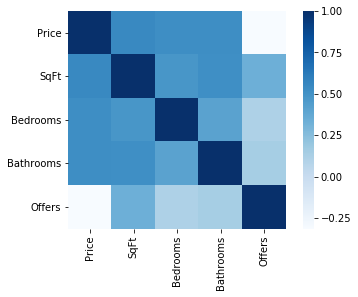

In [6]:
correlation = data.corr()
fig = plt.subplots()
sns.heatmap(correlation,vmax=1,square=True,cmap='Blues')

In [7]:
data.describe(include='all')

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
count,128.000000,128.000000,128.000000,128.000000,128.000000,128,128
unique,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,No,East
freq,NaN,NaN,NaN,NaN,NaN,86,45
mean,130427.343750,2000.937500,3.023438,2.445312,2.578125,NaN,NaN
std,26868.770371,211.572431,0.725951,0.514492,1.069324,NaN,NaN
min,69100.000000,1450.000000,2.000000,2.000000,1.000000,NaN,NaN
25%,111325.000000,1880.000000,3.000000,2.000000,2.000000,NaN,NaN
50%,125950.000000,2000.000000,3.000000,2.000000,3.000000,NaN,NaN
75%,148250.000000,2140.000000,3.000000,3.000000,3.000000,NaN,NaN


In [8]:
df = data[['SqFt','Bedrooms','Bathrooms','Price']]
df.describe()

,SqFt,Bedrooms,Bathrooms,Price
count,128.000000,128.000000,128.000000,128.000000
mean,2000.937500,3.023438,2.445312,130427.343750
std,211.572431,0.725951,0.514492,26868.770371
min,1450.000000,2.000000,2.000000,69100.000000
25%,1880.000000,3.000000,2.000000,111325.000000
50%,2000.000000,3.000000,2.000000,125950.000000
75%,2140.000000,3.000000,3.000000,148250.000000
max,2590.000000,5.000000,4.000000,211200.000000


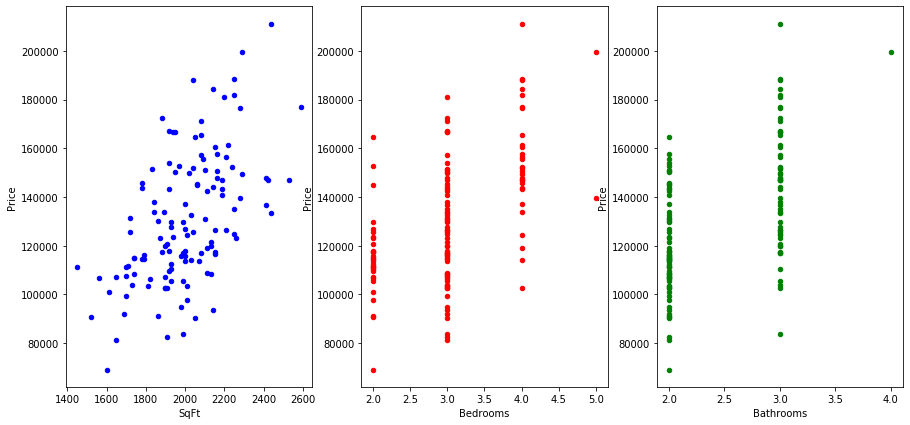

In [10]:
fig, axs = plt.subplots(1, 3)
df.plot(kind='scatter', x='SqFt', y='Price', ax = axs[0], figsize=(15, 7), color='blue')
df.plot(kind='scatter', x='Bedrooms', y='Price', ax = axs[1], color='red')
df.plot(kind='scatter', x='Bathrooms', y='Price', ax = axs[2], color='green')

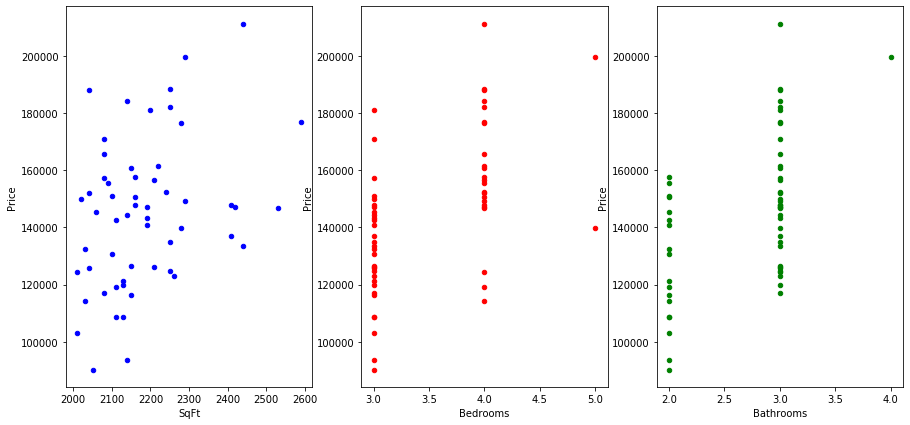

In [11]:
df = df[(df.SqFt>2000) & (df.Bedrooms>2)]
fig, axs = plt.subplots(1, 3)
df.plot(kind='scatter', x='SqFt', y='Price', ax = axs[0], figsize=(15, 7), color='blue')
df.plot(kind='scatter', x='Bedrooms', y='Price', ax = axs[1], color='red')
df.plot(kind='scatter', x='Bathrooms', y='Price', ax = axs[2], color='green')

In [12]:
df.describe(include='all')

,SqFt,Bedrooms,Bathrooms,Price
count,56.000000,56.000000,56.000000,56.000000
mean,2183.928571,3.482143,2.696429,144673.214286
std,133.248620,0.571794,0.501621,26011.064017
min,2010.000000,3.000000,2.000000,90300.000000
25%,2087.500000,3.000000,2.000000,125425.000000
50%,2150.000000,3.000000,3.000000,146200.000000
75%,2250.000000,4.000000,3.000000,157225.000000
max,2590.000000,5.000000,4.000000,211200.000000


In [13]:
params = ['SqFt', 'Bedrooms', 'Bathrooms']
price = ['Price']

X  = df[params][:-3]
Y  = df[price][:-3]

Xt = df[params][:3]
Yt = df[price][:3]

In [14]:
lasso = linear_model.Lasso(alpha = 1)
lasso.fit(X, Y)
P = lasso.predict(Xt)
print(lasso.coef_)
print(metrics.mean_squared_error(Yt, P))

[   20.25793263 18035.76692272 18556.34125196]
373315754.8180143


In [15]:
lin = linear_model.LinearRegression()
lin.fit(X, Y)
P = lin.predict(Xt)
print( lin.coef_)
print(metrics.mean_squared_error(Yt, P))

[[   20.24849701 18038.13731005 18560.43073032]]
373332351.01170015


In [16]:
ridge = linear_model.Ridge(alpha = 1)
ridge.fit(X, Y)
P = ridge.predict(Xt)
print( ridge.coef_)
print(metrics.mean_squared_error(Yt, P))

[[   23.33948034 17264.88294287 17229.29297038]]
367949850.7040878


In [17]:
enet = linear_model.ElasticNet(alpha = 1, l1_ratio = 0.5)
enet.fit(X, Y)
P = enet.predict(Xt)
print(enet.coef_)
print(metrics.mean_squared_error(Yt, P))

[  51.92632716 7853.44137053 6373.58908864]
322024393.7630792
